# <b>Analysis</b>
Prior to processing the data, a brief analysis is conducted to get a better understanding of the data that we are working with. This analysis allows us to assess the quality of the data (bad - average - good) and ultimately determine how the subsequent steps in the processing should be shaped

## Load necessary libraries

In [3]:
import pandas as pd
import seaborn as sns

## Load in raw data

### Company based products and services
This data contains the products and services derived from the scraped companies data originating from Austria, France, Germany, Netherlands, and Spain

In [4]:
# Determine the location of the dataframe containing the company based products and services
company_based_p_and_s_location = "../data/example_data/input/tilt_base_products_and_services_unprocessed.csv"

# Read the dataframe
company_based_p_and_s  = pd.read_csv(company_based_p_and_s_location)

# Display dataframe
display(company_based_p_and_s)

,products_id,products_and_services
0,164399edbf8e880dc2e856f50d51e720bd0a8abe,"fish, frozen and deep-frozen"
1,b0d3c55743b1b858ec2843c8870116bb8af543fd,drilling and test boring - equipment
2,b14c038972e6a52bfbf3ffbe77def57a62c5b9cf,well-management services
3,abadc2542b4b5c1ecfe41c22afb2347b1d9b65af,electronic data processing - software
4,60c58ad2ef34d96fae028f1039fab03dec9eb9a2,communication
...,...,...
32058,a56bfdd9971ddba76de33e5dd394faab63d2c58c,trading in non-ferrous products
32059,d16685f9db86a7e446d5a4c763a17016ffdfa613,precision weights for scales
32060,37c8e6d302d907a76f49d45a91949c86dd5fcc03,weights and masses - measurement and verificat...
32061,4aa756effa61af41058cf80f475a03b439232cfe,manicure scissors


### EuroPages products and services catalogue
This data contains the products and services directly scraped from the EP activities catalogue

In [5]:
# Determine the location of the dataframe containing the company based products and services
europages_activities_catalogue_location = "../data/example_data/input/scraped_data/scraped_EP_products_catalogue.csv"

# Read the dataframe
europages_activities_catalogue  = pd.read_csv(europages_activities_catalogue_location)

# Display dataframe
display(europages_activities_catalogue)

,products_and_services,products_id,ID
0,a0 size photocopy,d767925b2b31998720be47150c317b8b,1
1,a4 self-adhesive sheets,8b14539d24b4e721f7b0a2f4355e2698,2
2,abamectin,3f9bdd95cac6914274f80462954d0c04,3
3,abattoir with agreed store,e4ddbcf93fb7a754239358b82e0892de,4
4,abattoirs,0c43e8a2b18ffba9573fd91343865dca,5
...,...,...,...
42449,zootechnical feed,31038b5276adc87194b0f647ae36abf8,42450
42450,zootechnical foods,5306a7f02167e79365c7626ac48b4ff5,42451
42451,zootechnical integrators,62f4c57406cd9fb1190b67ea25cb48ce,42452
42452,zootechnics - equipment,3d86fe5ed83d4c4fe2304a311967a39e,42453


### new Italy Data

In [6]:
# Determine the location of the dataframe containing the new italy tilt data
italy_tilt_data_location = "../data/example_data/input/tilt_italy_products_and_services_unprocessed.csv"

# Read the dataframe
italy_tilt_data  = pd.read_csv(italy_tilt_data_location)

# Display dataframe
display(italy_tilt_data)

,products_and_services,products_id
0,persian blue salt,50abde66-58b7-4fb3-a007-1077fa41a010
1,organic saffron bio,0ea739bc-c3fb-4476-b8d6-96ba5085aa00
2,rossoro,2b898f73-e699-4b52-926d-476b51dacd42
3,peas,a7849fec-bf97-48b0-b89b-cb910a8d6dc8
4,cauliflowers,e09840c2-df4a-4920-b91b-e23177b5f5b3
...,...,...
3430,enamels,77890bab-e5c2-40d1-bcf7-f11fb9ac8c09
3431,breathable and mould resistant plastic coverings,d675d682-018e-4829-ac66-e61155d7a45e
3432,quartz paints,e5f78c8c-b79e-4a12-8451-867349f09cc6
3433,carpet,1f4814fc-759f-49b6-b2cc-9ba1c77582bd


## Conducting analysis

### Analysis helper functions

In [7]:
def run_analysis(dataframe):
    # determine the number of rows containing missing values
    nan_rows = dataframe.isna().any(axis=1)
    print("There are {} products with a missing products information".format(nan_rows.sum()))
    # see if there are duplicate products
    sentences = dataframe["products_and_services"].tolist()
    unique_sentences = dataframe["products_and_services"].unique()
    print('There are {} unique products'.format(len(unique_sentences)))
    # generate a product word length distribution plot
    generate_plot(sentences)

def generate_plot(df_sentences):
    length_dict = dict()

    # get count for each sentence length
    for i in range(len(df_sentences)):
        length_dict[len(df_sentences[i].split())] = length_dict.get(len(df_sentences[i].split()), 0) + 1

    sns.set_style("whitegrid")
    
    # plot boxplot
    plot = sns.barplot(x=length_dict.keys(), y=length_dict.values())
    
    # add label to the axis and label to the plot
    _ = plot.set(xlabel ="Sentence length (word count)", ylabel = "Frequency", title ='Sentence Length Distribution')

In [8]:
def ep_catalogue_coverage(df_1, df_2):
    # Merge the two dataframes based on the 'products_and_services' column
    merged_df = df_1.merge(df_2, on='products_and_services', how='inner')

    # Calculate the percentage of overlap
    overlap_percentage = len(merged_df) / len(df_1) * 100

    # Print the percentage of overlap
    print(f"The EuroPages catalogue covers the dataset for {overlap_percentage:.2f}%")

### Individual level

#### Company based products and services

There are 0 products with a missing products information
There are 32063 unique products


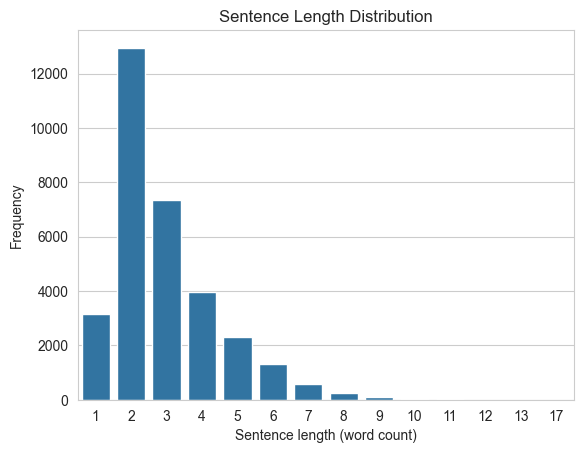

In [9]:
run_analysis(company_based_p_and_s)

#### EuroPages products and services catalogue

There are 0 products with a missing products information
There are 42454 unique products


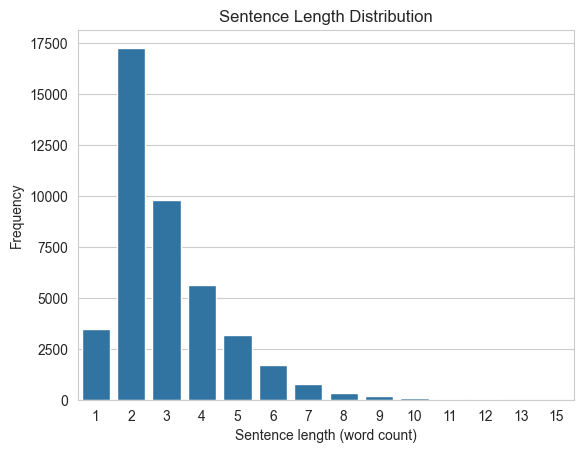

In [10]:
run_analysis(europages_activities_catalogue)

#### new Italy Data

There are 0 products with a missing products information
There are 3435 unique products


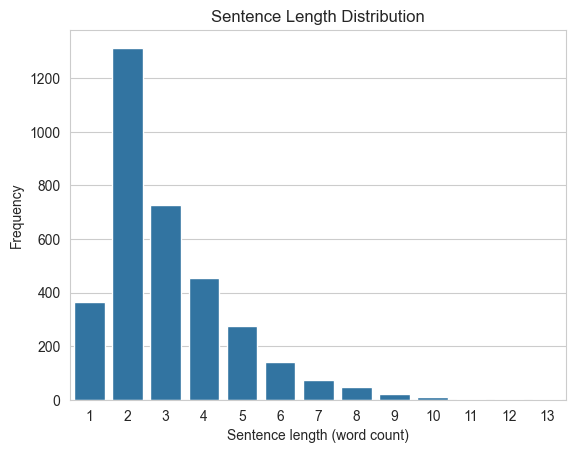

In [11]:
run_analysis(italy_tilt_data)

### In-between level

#### Company based vs EuroPages

In [12]:
ep_catalogue_coverage(company_based_p_and_s, europages_activities_catalogue)

The EuroPages catalogue covers the dataset for 55.16%


#### new Italy Data vs EuroPages

In [13]:
ep_catalogue_coverage(italy_tilt_data, europages_activities_catalogue)

The EuroPages catalogue covers the dataset for 75.60%
